In [452]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import tqdm

import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.utils.data import Dataset, DataLoader




In [453]:
! pip install torch

In [454]:
import random
def set_seed(SEED):
    random.seed(SEED)
    np.random.seed(SEED)
    torch.manual_seed(SEED)
set_seed(40)

In [455]:
#Load Data
fully_processed_path = '../data/fully_processed/full_normalized_None.csv'
dataset = pd.read_csv(fully_processed_path)

#print(dataset.columns)
#print(dataset)

#X, y = dataset.drop(["name", "is_all_star"], axis=1), dataset["is_all_star"]

X = dataset.drop(['name'],axis=1)


In [456]:
#normalize every player feature based on position and season

In [457]:
SEED = 69
train_ratio = 0.6
test_ratio = 0.2
val_ratio = 0.2

X_train, X_tmp = train_test_split(X, test_size=test_ratio+val_ratio)
X_test, X_val = train_test_split(X_tmp,test_size=val_ratio/(val_ratio + test_ratio))

In [458]:
'''
all_stars = X_train[X_train['is_all_star'] == 1]
non_all_stars = X_train[X_train['is_all_star'] == 0]
all_stars = all_stars.sample(n=non_all_stars.shape[0], replace = True)
X_train = pd.concat([all_stars, non_all_stars])
X_train = X_train.sample(frac=1)
'''

"\nall_stars = X_train[X_train['is_all_star'] == 1]\nnon_all_stars = X_train[X_train['is_all_star'] == 0]\nall_stars = all_stars.sample(n=non_all_stars.shape[0], replace = True)\nX_train = pd.concat([all_stars, non_all_stars])\nX_train = X_train.sample(frac=1)\n"

In [459]:
#X.head()
X_train[X_train['is_all_star'] == 1]

,age,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,free_throw_attempt_rate,offensive_rebound_percentage,defensive_rebound_percentage,total_rebound_percentage,...,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,POS_CENTER,POS_POINT GUARD,POS_POWER FORWARD,POS_SHOOTING GUARD,POS_SMALL FORWARD,is_all_star
8392,3.026412,0.881908,0.866351,0.942753,-0.042901,-1.133944,0.597906,0.827797,0.402423,0.613014,...,0.799677,0.309593,0.838864,1.094383,0,0,0,1,0,1
7656,0.231294,1.010335,1.928625,1.789750,0.656781,0.604894,0.914289,0.061403,-0.078750,-0.050452,...,2.192356,0.312240,1.840409,4.144447,0,1,0,0,0,1
7330,0.316904,1.139628,1.787738,2.923514,0.511870,-0.319356,0.919078,2.172290,4.954738,4.764279,...,2.597015,1.713709,3.098528,4.365603,0,1,0,0,0,1
5096,2.229294,0.576916,1.048563,0.813756,0.258776,-0.120820,-0.568190,-1.055545,0.929528,0.043767,...,0.764021,0.994624,0.957654,1.677385,1,0,0,0,0,1
3462,1.290585,0.912610,1.544014,1.020626,0.771698,-0.219654,1.794169,-0.581855,0.485424,0.069559,...,1.255009,0.489169,1.166839,1.833439,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8441,-0.173618,0.855893,1.251326,3.194629,0.662102,-0.742527,1.200273,0.512421,3.396645,2.992803,...,2.854890,2.929573,3.375981,5.654306,0,0,1,0,0,1
2282,-1.068500,0.629686,1.613921,1.199162,0.636461,0.167689,0.447669,-0.505076,1.098936,0.471207,...,1.136576,-0.049448,0.884364,2.136887,1,0,0,0,0,1
4234,-0.732872,1.032885,1.890820,1.319847,0.603893,-0.221421,-0.748877,-0.462170,0.727995,0.337028,...,1.370046,0.631601,1.399376,3.010702,1,0,0,0,0,1
7546,0.315559,0.759251,1.363543,0.446350,0.263330,0.238866,0.281477,-0.492574,0.246469,0.094206,...,0.561201,1.302284,0.909956,1.818271,0,0,1,0,0,1


In [460]:
'''
#split dataset into 60/20/20 for training, testing, validation
SEED = 69
train_ratio = 0.6
test_ratio = 0.2
val_ratio = 0.2



X, y = X.drop(columns=['is_all_star']), X['is_all_star']

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=test_ratio+val_ratio)
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=val_ratio/(val_ratio + test_ratio))
'''
X_train, y_train = X_train.drop(columns=['is_all_star']), X_train['is_all_star']
X_test, y_test = X_test.drop(columns=['is_all_star']), X_test['is_all_star']
X_val, y_val = X_val.drop(columns=['is_all_star']), X_val['is_all_star']

#convert data to tensors
X_train, X_test, X_val = torch.LongTensor(X_train.values), torch.LongTensor(X_test.values), torch.LongTensor(X_val.values)
y_train, y_test, y_val = torch.LongTensor(y_train.values), torch.LongTensor(y_test.values), torch.LongTensor(y_val.values)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

torch.Size([5698, 28]) torch.Size([1900, 28]) torch.Size([1900, 28])
torch.Size([5698]) torch.Size([1900]) torch.Size([1900])


In [461]:
class dataset(Dataset):
  def __init__(self,X,y):
    self.X = X.float()
    self.y = y.float()
    self.length = self.X.shape[0]
 
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]
  def __len__(self):
    return self.length

In [462]:
class AllStarClassifier(nn.Module):
    def __init__(self, LAYER_1=30, LAYER_2=10, LAYER_3 = 10, LAYER_4 = 10):
      super(AllStarClassifier, self).__init__()
      # dense layers
      self.layer1 = nn.Linear(LAYER_1, LAYER_2)
      self.layer2 = nn.Linear(LAYER_2,  LAYER_3)
      self.layer3 = nn.Linear(LAYER_3,  LAYER_4)
      self.layer4 = nn.Linear(LAYER_4,  1)

    def forward(self, X):

      X = self.layer1(X)
      X = F.relu(X)
      X = self.layer2(X)
      X = F.relu(X)
      X = self.layer3(X)
      X = F.relu(X)
      X = self.layer4(X)
      return torch.sigmoid(X)

In [463]:
loss_fn = nn.BCELoss()

learning_rate = 0.05
num_epochs = 20
batch_size = 32

In [464]:
train_set = dataset(X_train,y_train)
test_set = dataset(X_test,y_test)
val_set = dataset(X_val,y_val)
#DataLoader
train_loader = DataLoader(train_set,batch_size=batch_size,shuffle=False)
test_loader = DataLoader(test_set,batch_size=batch_size,shuffle=False)
val_loader = DataLoader(val_set,batch_size=batch_size,shuffle=False)

In [465]:
def EvalNet(dev_loader, net):
    num_correct = 0
    epoch_accuracy = []
    epoch_loss = []
    y_pred = []
    y_actual = []
    for i,(X,y) in enumerate(dev_loader):
        output = net.forward(X)

        loss = loss_fn(output,y.reshape(-1,1))
        epoch_loss.append(loss.detach().numpy())

        #get pred and actual values
        y_pred.append(output.detach().numpy().round().reshape((output.shape[0])))
        y_actual.append(y.detach().numpy().reshape((y.shape[0])))

        accuracy = (output.reshape(-1).detach().numpy().round() == y.detach().numpy()).sum()/X.shape[0]
        epoch_accuracy.append(accuracy)

    eval_loss_list.append(sum(epoch_loss)/len(epoch_loss))
    eval_accuracy_list.append(sum(epoch_accuracy) / len(epoch_accuracy))

    y_pred = np.concatenate(y_pred)
    y_actual = np.concatenate(y_actual)

    print("Accuracy: %s" % (sum(epoch_accuracy) / len(epoch_accuracy)))

    return y_actual, y_pred

def Metrics(dev_loader, net):
  y, y_pred = EvalNet(dev_loader, net)
  conversion_dict = {0: 'Non-All-Star' ,1: 'All-Star'}
  processed_y, processed_y_pred = [],[]
  for i in range(len(y)):
    processed_y.append(conversion_dict[y[i]])
    processed_y_pred.append(conversion_dict[y_pred[i]])
  print(classification_report(processed_y, processed_y_pred, labels=['Non-All-Star', 'All-Star']))

def Train(net, train_loader, n_iter, dev_loader, learning_rate=0.01):
  print("Start Training!")
  optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

  for epoch in range(n_iter):
    total_loss = 0.0
    epoch_accuracy = []
    epoch_loss = []
    net.train()   #Put the network into training mode
    for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):
      output = net(X)
      
      loss = loss_fn(output,y.reshape(-1,1))
      epoch_loss.append(loss.detach().numpy())

      accuracy = (output.reshape(-1).detach().numpy().round() == y.detach().numpy()).sum()/(X.shape[0])
      epoch_accuracy.append(accuracy)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      

    train_accuracy_list.append(sum(epoch_accuracy)/len(epoch_accuracy))
    train_loss_list.append(sum(epoch_loss)/len(epoch_loss))
    
    net.eval()
    with torch.no_grad():
      print(f"Loss on Train {epoch} = {sum(epoch_loss)/len(epoch_loss)}")
      Metrics(dev_loader, net)
  return net

In [466]:
set_seed(100)

eval_loss_list = []
train_loss_list = []
eval_accuracy_list = []
train_accuracy_list = []

as_classifier = AllStarClassifier(LAYER_1=X_train.shape[1], LAYER_2=50, LAYER_3=25, LAYER_4=10)
trained_nn = Train(as_classifier, train_loader, num_epochs, val_loader, learning_rate=learning_rate)


Start Training!


/var/folders/qb/y1tbczls1jq3tcnsg6h5cd700000gn/T/ipykernel_90229/2314894765.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):


0it [00:00, ?it/s]

Loss on Train 0 = 0.29160328667257085
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

Non-All-Star       0.94      1.00      0.97      1795
    All-Star       0.00      0.00      0.00       105

    accuracy                           0.94      1900
   macro avg       0.47      0.50      0.49      1900
weighted avg       0.89      0.94      0.92      1900



/Users/manas/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manas/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manas/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/qb/y1tbczls1jq3

0it [00:00, ?it/s]

Loss on Train 1 = 0.13620347100929175
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

Non-All-Star       0.94      1.00      0.97      1795
    All-Star       0.00      0.00      0.00       105

    accuracy                           0.94      1900
   macro avg       0.47      0.50      0.49      1900
weighted avg       0.89      0.94      0.92      1900



/Users/manas/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manas/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manas/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/qb/y1tbczls1jq3

0it [00:00, ?it/s]

Loss on Train 2 = 0.10427426216426675
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

Non-All-Star       0.94      1.00      0.97      1795
    All-Star       0.00      0.00      0.00       105

    accuracy                           0.94      1900
   macro avg       0.47      0.50      0.49      1900
weighted avg       0.89      0.94      0.92      1900



/Users/manas/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manas/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manas/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/qb/y1tbczls1jq3

0it [00:00, ?it/s]

Loss on Train 3 = 0.08841823950128931
Accuracy: 0.9553819444444444
              precision    recall  f1-score   support

Non-All-Star       0.96      1.00      0.98      1795
    All-Star       0.89      0.23      0.36       105

    accuracy                           0.96      1900
   macro avg       0.92      0.61      0.67      1900
weighted avg       0.95      0.96      0.94      1900



/var/folders/qb/y1tbczls1jq3tcnsg6h5cd700000gn/T/ipykernel_90229/2314894765.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):


0it [00:00, ?it/s]

Loss on Train 4 = 0.07453295511750285
Accuracy: 0.9715277777777778
              precision    recall  f1-score   support

Non-All-Star       0.98      0.99      0.99      1795
    All-Star       0.76      0.72      0.74       105

    accuracy                           0.97      1900
   macro avg       0.87      0.86      0.86      1900
weighted avg       0.97      0.97      0.97      1900



/var/folders/qb/y1tbczls1jq3tcnsg6h5cd700000gn/T/ipykernel_90229/2314894765.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):


0it [00:00, ?it/s]

Loss on Train 5 = 0.06993447067137995
Accuracy: 0.9710069444444444
              precision    recall  f1-score   support

Non-All-Star       0.98      0.99      0.98      1795
    All-Star       0.75      0.72      0.74       105

    accuracy                           0.97      1900
   macro avg       0.87      0.85      0.86      1900
weighted avg       0.97      0.97      0.97      1900



/var/folders/qb/y1tbczls1jq3tcnsg6h5cd700000gn/T/ipykernel_90229/2314894765.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):


0it [00:00, ?it/s]

Loss on Train 6 = 0.0686588509674262
Accuracy: 0.9694444444444444
              precision    recall  f1-score   support

Non-All-Star       0.98      0.99      0.98      1795
    All-Star       0.74      0.70      0.72       105

    accuracy                           0.97      1900
   macro avg       0.86      0.84      0.85      1900
weighted avg       0.97      0.97      0.97      1900



/var/folders/qb/y1tbczls1jq3tcnsg6h5cd700000gn/T/ipykernel_90229/2314894765.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):


0it [00:00, ?it/s]

Loss on Train 7 = 0.06755911354521842
Accuracy: 0.968923611111111
              precision    recall  f1-score   support

Non-All-Star       0.98      0.98      0.98      1795
    All-Star       0.73      0.70      0.72       105

    accuracy                           0.97      1900
   macro avg       0.86      0.84      0.85      1900
weighted avg       0.97      0.97      0.97      1900



/var/folders/qb/y1tbczls1jq3tcnsg6h5cd700000gn/T/ipykernel_90229/2314894765.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):


0it [00:00, ?it/s]

Loss on Train 8 = 0.06674649285454323
Accuracy: 0.9694444444444444
              precision    recall  f1-score   support

Non-All-Star       0.98      0.98      0.98      1795
    All-Star       0.74      0.71      0.72       105

    accuracy                           0.97      1900
   macro avg       0.86      0.85      0.85      1900
weighted avg       0.97      0.97      0.97      1900



/var/folders/qb/y1tbczls1jq3tcnsg6h5cd700000gn/T/ipykernel_90229/2314894765.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):


0it [00:00, ?it/s]

Loss on Train 9 = 0.06617645945727783
Accuracy: 0.9720486111111111
              precision    recall  f1-score   support

Non-All-Star       0.98      0.99      0.99      1795
    All-Star       0.76      0.74      0.75       105

    accuracy                           0.97      1900
   macro avg       0.87      0.86      0.87      1900
weighted avg       0.97      0.97      0.97      1900



/var/folders/qb/y1tbczls1jq3tcnsg6h5cd700000gn/T/ipykernel_90229/2314894765.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):


0it [00:00, ?it/s]

Loss on Train 10 = 0.0657668878212467
Accuracy: 0.9710069444444444
              precision    recall  f1-score   support

Non-All-Star       0.98      0.99      0.98      1795
    All-Star       0.75      0.73      0.74       105

    accuracy                           0.97      1900
   macro avg       0.87      0.86      0.86      1900
weighted avg       0.97      0.97      0.97      1900



/var/folders/qb/y1tbczls1jq3tcnsg6h5cd700000gn/T/ipykernel_90229/2314894765.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):


0it [00:00, ?it/s]

Loss on Train 11 = 0.06528849818213067
Accuracy: 0.9720486111111111
              precision    recall  f1-score   support

Non-All-Star       0.99      0.99      0.99      1795
    All-Star       0.75      0.75      0.75       105

    accuracy                           0.97      1900
   macro avg       0.87      0.87      0.87      1900
weighted avg       0.97      0.97      0.97      1900



/var/folders/qb/y1tbczls1jq3tcnsg6h5cd700000gn/T/ipykernel_90229/2314894765.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):


0it [00:00, ?it/s]

Loss on Train 12 = 0.064849576240343
Accuracy: 0.9725694444444444
              precision    recall  f1-score   support

Non-All-Star       0.99      0.99      0.99      1795
    All-Star       0.75      0.76      0.76       105

    accuracy                           0.97      1900
   macro avg       0.87      0.87      0.87      1900
weighted avg       0.97      0.97      0.97      1900



/var/folders/qb/y1tbczls1jq3tcnsg6h5cd700000gn/T/ipykernel_90229/2314894765.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):


0it [00:00, ?it/s]

Loss on Train 13 = 0.06443609404845901
Accuracy: 0.9736111111111111
              precision    recall  f1-score   support

Non-All-Star       0.99      0.99      0.99      1795
    All-Star       0.76      0.78      0.77       105

    accuracy                           0.97      1900
   macro avg       0.87      0.88      0.88      1900
weighted avg       0.97      0.97      0.97      1900



/var/folders/qb/y1tbczls1jq3tcnsg6h5cd700000gn/T/ipykernel_90229/2314894765.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):


0it [00:00, ?it/s]

Loss on Train 14 = 0.0640220891543815
Accuracy: 0.9725694444444444
              precision    recall  f1-score   support

Non-All-Star       0.99      0.99      0.99      1795
    All-Star       0.75      0.76      0.76       105

    accuracy                           0.97      1900
   macro avg       0.87      0.87      0.87      1900
weighted avg       0.97      0.97      0.97      1900



/var/folders/qb/y1tbczls1jq3tcnsg6h5cd700000gn/T/ipykernel_90229/2314894765.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):


0it [00:00, ?it/s]

Loss on Train 15 = 0.0636628045630251
Accuracy: 0.9710069444444444
              precision    recall  f1-score   support

Non-All-Star       0.98      0.99      0.98      1795
    All-Star       0.75      0.73      0.74       105

    accuracy                           0.97      1900
   macro avg       0.87      0.86      0.86      1900
weighted avg       0.97      0.97      0.97      1900



/var/folders/qb/y1tbczls1jq3tcnsg6h5cd700000gn/T/ipykernel_90229/2314894765.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):


0it [00:00, ?it/s]

Loss on Train 16 = 0.06319171418279784
Accuracy: 0.9715277777777778
              precision    recall  f1-score   support

Non-All-Star       0.98      0.99      0.99      1795
    All-Star       0.76      0.72      0.74       105

    accuracy                           0.97      1900
   macro avg       0.87      0.86      0.86      1900
weighted avg       0.97      0.97      0.97      1900



/var/folders/qb/y1tbczls1jq3tcnsg6h5cd700000gn/T/ipykernel_90229/2314894765.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):


0it [00:00, ?it/s]

Loss on Train 17 = 0.06281926100501302
Accuracy: 0.9715277777777778
              precision    recall  f1-score   support

Non-All-Star       0.98      0.99      0.99      1795
    All-Star       0.76      0.72      0.74       105

    accuracy                           0.97      1900
   macro avg       0.87      0.86      0.86      1900
weighted avg       0.97      0.97      0.97      1900



/var/folders/qb/y1tbczls1jq3tcnsg6h5cd700000gn/T/ipykernel_90229/2314894765.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):


0it [00:00, ?it/s]

Loss on Train 18 = 0.06243931781890797
Accuracy: 0.970486111111111
              precision    recall  f1-score   support

Non-All-Star       0.98      0.99      0.98      1795
    All-Star       0.76      0.70      0.73       105

    accuracy                           0.97      1900
   macro avg       0.87      0.85      0.86      1900
weighted avg       0.97      0.97      0.97      1900



/var/folders/qb/y1tbczls1jq3tcnsg6h5cd700000gn/T/ipykernel_90229/2314894765.py:48: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,(X,y) in tqdm.tqdm_notebook(enumerate(train_loader)):


0it [00:00, ?it/s]

Loss on Train 19 = 0.062122750328853726
Accuracy: 0.9699652777777777
              precision    recall  f1-score   support

Non-All-Star       0.98      0.99      0.98      1795
    All-Star       0.75      0.70      0.72       105

    accuracy                           0.97      1900
   macro avg       0.87      0.84      0.85      1900
weighted avg       0.97      0.97      0.97      1900



In [467]:
print(dir(tqdm.tqdm_notebook))
print('tqdm_notebook' in dir(tqdm))
print(dir(tqdm.tqdm_notebook))

['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
True
['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


In [468]:
train_loss_list

[0.29160328667257085,
 0.13620347100929175,
 0.10427426216426675,
 0.08841823950128931,
 0.07453295511750285,
 0.06993447067137995,
 0.0686588509674262,
 0.06755911354521842,
 0.06674649285454323,
 0.06617645945727783,
 0.0657668878212467,
 0.06528849818213067,
 0.064849576240343,
 0.06443609404845901,
 0.0640220891543815,
 0.0636628045630251,
 0.06319171418279784,
 0.06281926100501302,
 0.06243931781890797,
 0.062122750328853726]

In [469]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

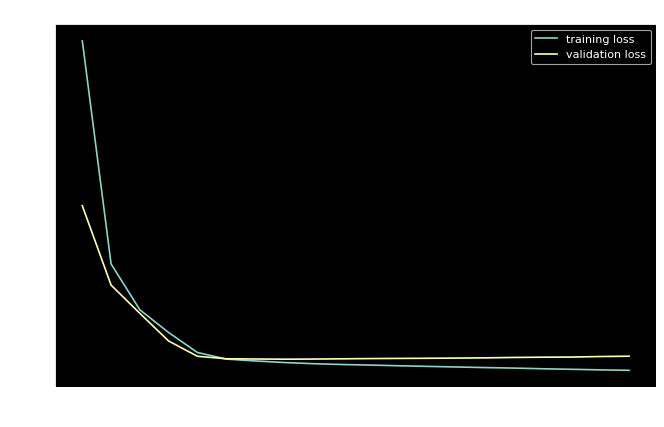

In [470]:
figure(figsize=(9.7, 6), dpi=80)

plt.plot(train_loss_list, label='training loss')
plt.plot(eval_loss_list, label='validation loss')
plt.title('Loss vs. Epochs Completed')
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy Loss")
plt.legend()

#plt.savefig('loss_v_epoch.png')

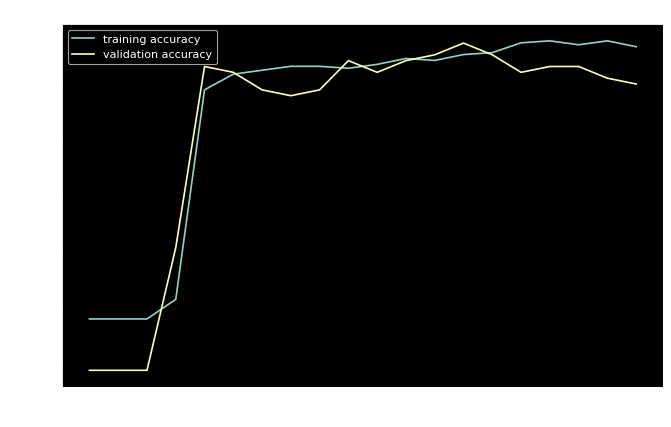

In [471]:
figure(figsize=(9.7,6), dpi=80)

plt.plot(train_accuracy_list, label='training accuracy')
plt.plot(eval_accuracy_list, label='validation accuracy')
plt.title('Accuracy vs. Epochs Completed')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#plt.savefig('acc_v_epoch.png')